In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv(f'shopping_trends.csv')
df.head(10)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [3]:
df.shape

(3900, 19)

In [4]:
df.describe()

,Customer_ID,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_(USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [7]:
df.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_(USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [8]:
# Most Item Purchased
item_purch = df['Category'].value_counts()
item_purch

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

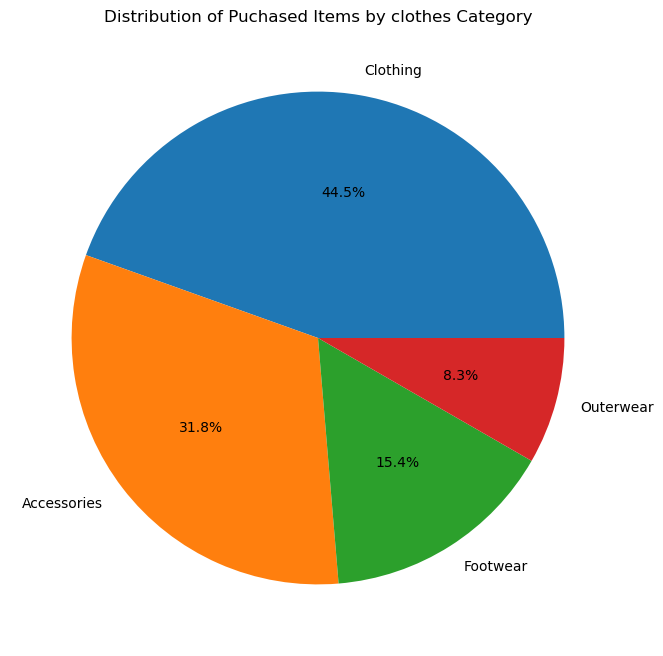

In [9]:
fig = plt.figure(figsize=(20,8))
plt.pie(item_purch.values, labels=item_purch.index, autopct='%1.1f%%')
plt.title('Distribution of Puchased Items by clothes Category')
plt.show()

In [10]:
# Item purchased by amount
item = df.groupby('Item_Purchased')['Purchase_Amount_(USD)'].sum()
item

Item_Purchased
Backpack       8636
Belt           9635
Blouse        10410
Boots          9018
Coat           9275
Dress         10320
Gloves         8477
Handbag        8857
Hat            9375
Hoodie         8767
Jacket         9249
Jeans          7548
Jewelry       10010
Pants         10090
Sandals        9200
Scarf          9561
Shirt         10332
Shoes          9240
Shorts         9433
Skirt          9402
Sneakers       8635
Socks          9252
Sunglasses     9649
Sweater        9462
T-shirt        9248
Name: Purchase_Amount_(USD), dtype: int64

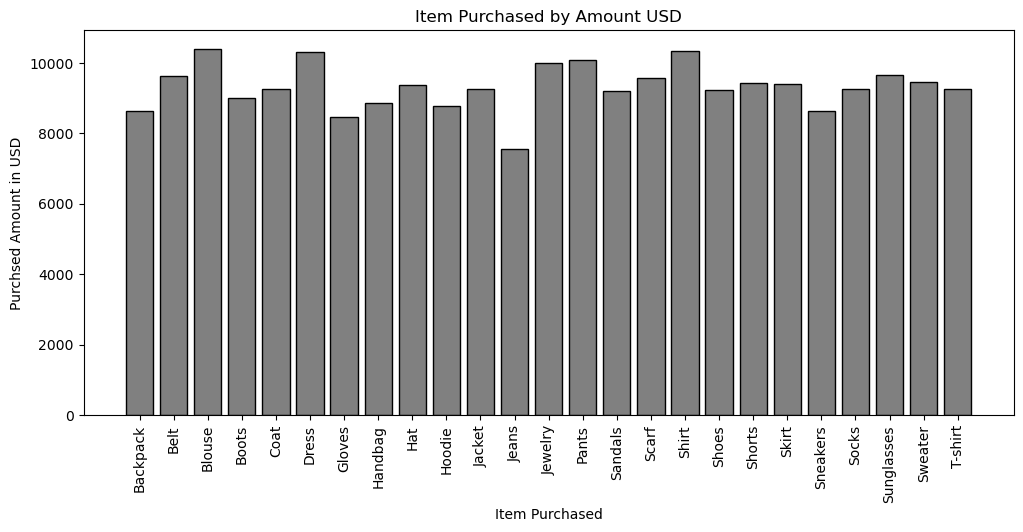

In [11]:
fig = plt.figure(figsize=(12,5))
plt.bar(item.index,item.values, color = 'grey', edgecolor = 'black')
plt.xlabel('Item Purchased')
plt.ylabel('Purchsed Amount in USD')
plt.title('Item Purchased by Amount USD')
plt.xticks(rotation=90)
plt.show()

In [12]:
cat = df['Category'].value_counts()
cat

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

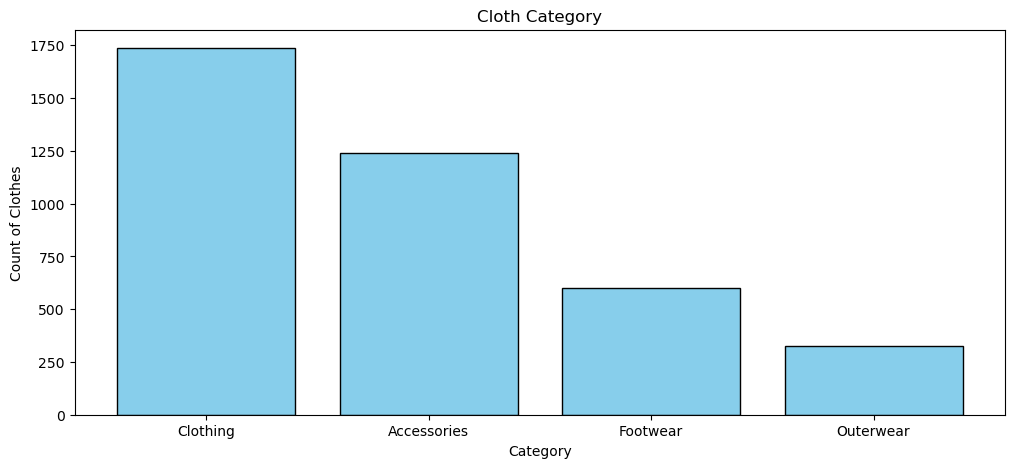

In [13]:
fig = plt.figure(figsize=(12,5))
plt.bar(cat.index, cat.values, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Category')
plt.ylabel('Count of Clothes')
plt.title('Cloth Category')
plt.show()

In [14]:
pay_mode = df['Preferred_Payment_Method'].value_counts()
pay_mode

Preferred_Payment_Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

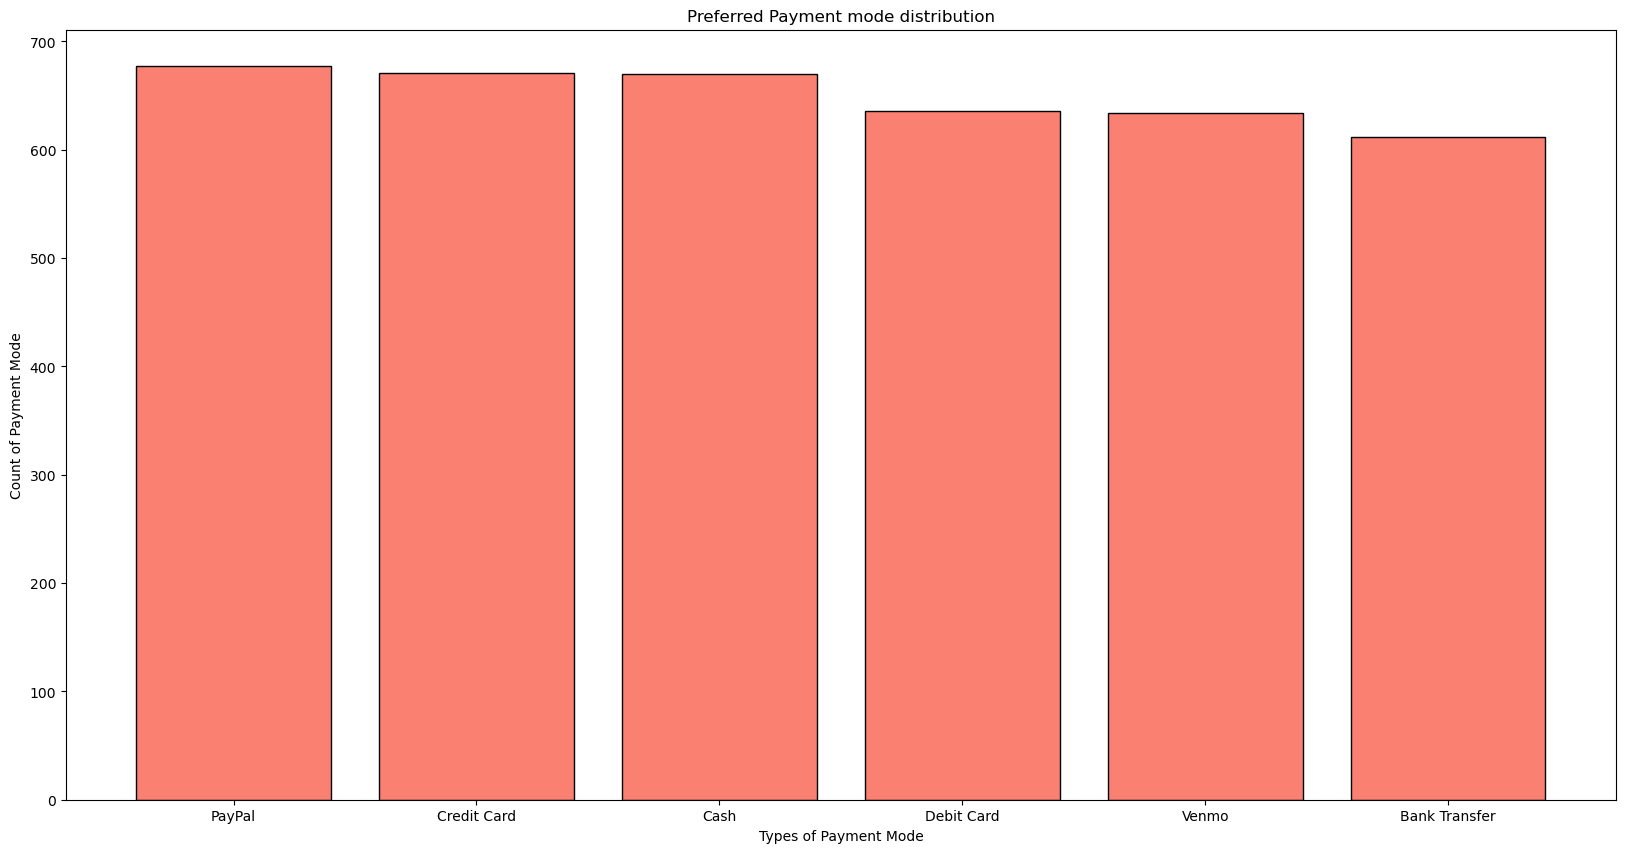

In [15]:
# Distribution of payment mode
fig = plt.figure(figsize=(20,10))
plt.bar(pay_mode.index, pay_mode.values, color = 'salmon', edgecolor = 'black')
plt.xlabel('Types of Payment Mode')
plt.ylabel('Count of Payment Mode')
plt.title('Preferred Payment mode distribution')
plt.show()

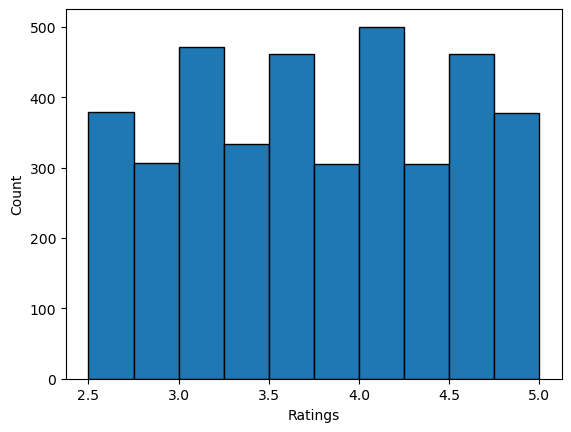

In [16]:
# Histogram for size
plt.hist(df.Review_Rating,edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [17]:
df.head(5)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [18]:
Location_cust = df.groupby('Location')['Customer_ID'].sum()
Location_cust

Location
Alabama           173989
Alaska            148861
Arizona           138112
Arkansas          153348
California        183680
Colorado          153633
Connecticut       166820
Delaware          154390
Florida           128056
Georgia           159761
Hawaii            114343
Idaho             191380
Illinois          185614
Indiana           134408
Iowa              118705
Kansas            154471
Kentucky          153954
Louisiana         161655
Maine             160408
Maryland          167032
Massachusetts     128446
Michigan          153937
Minnesota         171311
Mississippi       154568
Missouri          142015
Montana           197055
Nebraska          169570
Nevada            159930
New Hampshire     141813
New Jersey        135481
New Mexico        155023
New York          168999
North Carolina    143717
North Dakota      155346
Ohio              151093
Oklahoma          139918
Oregon            138951
Pennsylvania      146755
Rhode Island      125759
South Carolina  

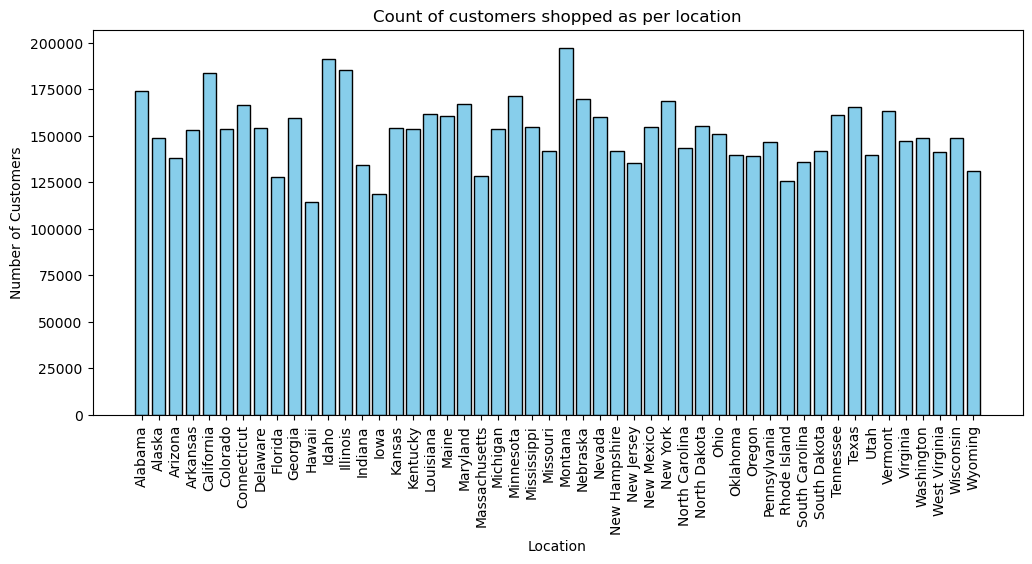

In [19]:
fig = plt.figure(figsize=(12,5))
plt.bar(Location_cust.index,Location_cust.values, color = 'Skyblue', edgecolor = 'black')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.title('Count of customers shopped as per location')
plt.xticks(rotation=90)
plt.show()

## Machine Learning Algorithms

In [21]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_(USD)', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Gender'] = encode.fit_transform(df['Gender'])
df['Item_Purchased'] = encode.fit_transform(df['Item_Purchased'])
df['Category'] = encode.fit_transform(df['Category'])
df['Location'] = encode.fit_transform(df['Location'])
df['Color'] = encode.fit_transform(df['Color'])
df['Season'] = encode.fit_transform(df['Season'])
df['Payment_Method'] = encode.fit_transform(df['Payment_Method'])
df['Subscription_Status'] = encode.fit_transform(df['Subscription_Status'])
df['Shipping_Type'] = encode.fit_transform(df['Shipping_Type'])
df['Discount_Applied'] = encode.fit_transform(df['Discount_Applied'])
df['Promo_Code_Used'] = encode.fit_transform(df['Promo_Code_Used'])
df['Preferred_Payment_Method'] = encode.fit_transform(df['Preferred_Payment_Method'])
df['Frequency_of_Purchases'] = encode.fit_transform(df['Frequency_of_Purchases'])
df['Size'] = encode.fit_transform(df['Size'])

In [23]:
df.head(5)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0


In [110]:
X = df.drop('Subscription_Status', axis=1)
y = df['Subscription_Status']

In [112]:
# Splitting input train and test
x_tr,x_ts,y_tr,y_ts = train_test_split(X,y, test_size=0.2)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [116]:
# Applying Decision Tree
Accuracies = []
model = DecisionTreeClassifier()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_ts)
Accuracies.append(accuracy_score(y_ts, y_pred)*100)
Accuracies

[100.0]

In [122]:
#Naive Bayes
Accuracies = []
model = GaussianNB()
model.fit(x_tr,y_tr)
y_pr = model.predict(x_ts)
Accuracies.append(accuracy_score(y_ts,y_pr)*100)
Accuracies

[85.8974358974359]

In [124]:
#KNN
Accuracies = []
model = KNeighborsClassifier()
model.fit(x_tr,y_tr)
y_pr = model.predict(x_ts)
Accuracies.append(accuracy_score(y_ts,y_pr)*100)
Accuracies

[100.0]

In [126]:
from sklearn.svm import SVC
Accuracies = []
model = SVC()
model.fit(x_tr,y_tr)
y_pr = model.predict(x_ts)
Accuracies.append(accuracy_score(y_ts,y_pr)*100)
Accuracies

[99.74358974358975]